For Tensorflow with GPU, run this notebook via WSL:

PS C:\Users\dougr> wsl

(base) drandrade@Doug-PC:/mnt/c/Users/dougr$ jupyter-notebook

# Perogi's Emotions Classification Model - Convolutional Neural Network with Transfer Learning and Fine-Tuning

<div>
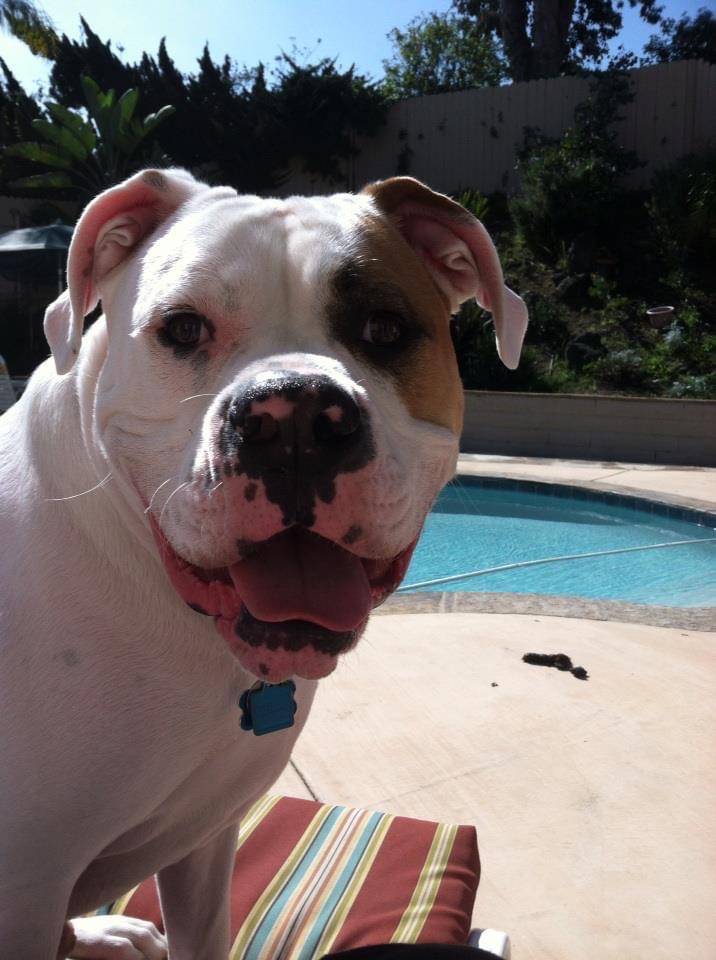
</div>

## Project Overview

### Motivation
The motivation of this project is to explore the application of Convolutional Neural Network (CNN) modeling with `Keras` and `TensorFlow` using a single NVIDIA GPU. After the passing of my wife's American Bulldog, Perogi, my wife inspired me to leverage this project to classify images of of Perogi's life with particular interest in efficiently sorting out his happiest moments.

### Image Dataset
The project intended to begin with the simple but manually intensive approach of building a personally design Tensorflow CNN model trained on $100$ manually labeled images of Perogi. However, I came across a labeled dataset on Kaggle [Dog Emotions Prediction dataset](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction), "Dog Emotions", which came with $15,900$ images stored within four labeled sub-directories "angry", "happy", "relaxed", "sad". 

##### Data Set Exploration and Preparation
On initial image visualization and data exploration, it became apparent that the "Dog Emotion" images was inconsistently labeled, likely due to varied and biased opinions of what a "happy", "angry", "relaxed", or "sad" dog looks like. There was well over $2,000$ images of animals other than dogs, such as cartoons, lions, cats, monkeys, cows, horses, rabbits, etc. Consequently, I elected to manually re-label images based on consistent and objective emotional features, with an additional fifth class - `frown`. For ease of coding to associate directory label titles with one-hot encoding, I adjusted the label names to have exactly five characters each, for a final dataset total of $9,325$ images:
- `alert` - the appearance of vigilance and attention toward something (wide eyes, stiff ears, rigid body)
- `angry` - the appearance of growling, with an aggressive display of teeth
- `frown` - the appearance of dejection, pain, or abuse
- `happy` - the display of the tongue, with a near human-like appearance of a smile
- `relax` - laying down or having the appearance of resting or doing nothing in particular
        
6,575 images were remove for three reasons: 
- images other than a real dog
- the dog's face was not visible
- it did not reasonably fall within one of the five classes. 

This effort was an extremely slow and and time consuming process done, however it underlined the criticality of data quailty and maintenance in order to design a useful classification model.

The dataset was split into $80%$ training and $20%$ validation, and randomly shuffled in order to maximize each dataset combination's of classes. The images are instantiated at an RGB $3$-dimensional size ($128$x$128$x$3$).

### Model Development
I applied transfer learning and model fine-tuning to maximize my compute resources for optimal model performance. To establish a model performance standard and to validate my model development approach, I built and tested a few basics CNN models. The best non-transfer learning and non-fine-tuned CNN model my machine could handle achieved a maximum validation accuracy of ~40% with up to five hidden convolutional hidden layers, before exhausting local machine memory.

For the transfer leanring CNN model, I selected the `EfficientNetV2S` model for its heuristic development as a small model ($6.8$ times smaller than other models trained on the ImageNet dataset) with improved training speed and parameter efficiency ([EfficientNetV2: Smaller Models and Faster Training paper](https://arxiv.org/abs/2104.00298)). I iterate over various combinations of fully connected dense layers added on top on `EfficientNetV2S`, while constraining the model training with categorical crossentroy learning rate reduction and early stopping callback features.

Fine-tuning development was center around finding the optimal `EfficientNetV2S` layer to be to unfreeze after the best transfer learning performance was achieved.

### Model Evaluation
A combination of metric plotting (training and validation accuracy, categorical crossentroy, and F1 Score), confusion matrix visualization (for class F1 Scoring), as well as a metrics record table were used to evaluation model testing and performance.

### Practical Evaluation
The real test, after a satisfactory model evaluation, was to observe how the model classified images of Perogi, and in particular the introduction image.

## Project Flow and Plan<a id='plan'></a>

1. [Problem Statement and Objectives](#step1)
2. [Modeling Metrics](#step2)
3. [Load Required Modules](#step3)
4. [Set-Up the Python Enviroment](#step4)
5. [Load and Preview the Data](#step5)
6. [CNN Transfer Learning Model Design](#step6)
    1. [CNN Model Parameters](#step6.a)
    2. [CNN Callback Features](#step6.b)
    3. [CNN Transfer Learning Model set-up](#step6.c)
    4. [Train the CNN Transfer Learning Model](#step6.d)
    5. [CNN Transfer Learning Model Performance Analysis](#step6.e)
7. [CNN Fine-Tuning Model Design](#step7)
    1. [CNN Fine-Tuning Model Set-Up](#step7.a)
    2. [Train and Fine-Tune the CNN Transfer Model](#step7.b)
    3. [Fine-Tuned CNN transfer learning model performance analysis](#step7.c)
    4. [Display Predicted Emotions From Validation Set](#step7.d)
8. [Final CNN Model Confusion Matrix](#step8)
9. [Final CNN Model Evaluation on Unseen Images of Perogi](#step9)
10.  [Project Summary and Metrics History Review](#step10)


## Problem Statement<a id='step1'></a>
Create a CNN model that can appropriately label $202$ unseen images of my wife's late American Bulldog, Perogi. 

#### The data preparation, model design and training plan:
1. Manually clean and re-label Kaggle's [Dog Emotions](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction) data set into five classes (angry, happy, pouty, relax, frown), and randomly split into $80%$ train and $20%$ validation images.
2. Establish basic initial image size and modeling parameters to test a simple model's functionality and performance.
    - I started with grayscale images and standard parameters:
        - Large image `batch` size.
        - Small `epoch` limit.
        - `ReLU` activation layer.
        - `softmax` output layer.
3. Build a simple CNN model.
    - I iteratively built the model beginning with a single `Conv2D` layer with the simple initial parameters.
    - I iteratively added `Conv2D` and `Dense` layer depth to the model, based on metrics improvement and compute resource limitations.   
4. Apply image augmentation to maximize training effectiveness on the limited training dataset size
    - `RandomRotation` - image rotation up to $45^\circ$.
    - `RandomFlip` - flipping image across the vertical axis.
5. Tune `Conv2D` and `Dense` layer hyperparameters to improve validation accuracy and training efficiency.
6. Add overfitting control layers after each hidden Conv2D and Dense layer
    - `MaxPool2D` layers.
    - `BatchNormalization` layers.
    - `Dropout` layers.
7. Visualize the training and validation results.
8. Apply transfer learning using Google's designed EfficientNetV2S and the CNN layers already built.
    - Re-apply steps 5-7, monitoring for performance and efficiency.
9. Apply fine-tuning to improve the model's validation accuracy.
    - Iteratively unfreeze different `EfficientNetV2S` bottom layers for weight adjustment and evaluate model improvement.
10. Create the final training and validation performance plots.
    - Update the metrics plot.
    - Visualize examples of predictions versus actual labels.
    - Create a confusion matrix.
11. Apply the model on the $202$ unseen images of Perogi, and provide a sample visual of Perogi and the predicted labels.
12. Test for the classification of the opening image of Perogi.

#### Desired Objective
The primary intent of the project was for self-learning and to develop an independent understanding of deep learning applications. The project's conclusion achieved the intent and provided a deeper understanding of how a CNN model is designed and built. The ability to design a model to effectively recognize dog facial emotions on a personal laptop with a single GPU by leveraging transfer learning and fine tuning proved highly pragmatic.

The secondary objective was to satisfy a series of performance metrics (prioritized):
1. Consistently classify the opening image of Rogi as "Happy"
2. Achieve a validation accuracy $>= 70%$ 
3. Achieve a class F1-Scores $>= 25%$

[Return to the Project Flow and Plan](#plan)

## Performance Metrics<a id='step2'></a>
Validation accuracy and validation categorical cross-entropy were the primary metrics applied to the model training, with the goal of achieving better performance than simple chance to predict one of four labels ($>20%$ accuracy) with the lowest categorical cross-entropy value.

- The Loss Function, also known as the objective function, is the model performance metric that will be calculated during each epoch of training to measure model performance. Entropy is the measure of uncertainty of the model's true predictions. Categorical crossentropy is specifically applied to measure multi-classification problems with one-hot encoded labels. The model with the lowest entropy represents true predictions with the least uncertainty and therefore of most confidence.

- Optimizer Function is the function that will be applied to attempt to find the model's objective global minimum, using stochastic gradient descent (`SDG`) - the tensor equivalent of calculating the derivative of a scalar function or slope applied on random mini-batches across a large neural network. Root Mean Squared Propagation (`RMSProp`) is the specific optimizing function applied to minimize the loss function, which is an efficient adaptation of `SGD` (p. 52).

- The monitoring metric to evaluate modeling training performance is accuracy. `Accuracy` is defined as the total number of predicted True Positives and True Negatives divided by the total data set size. This metric was preferred because I wanted to optimize the model weights based on the best possible accuracy, while measuring loss based on the best-possible crossentropy.

[Return to the Project Flow and Plan](#plan)


## Required Modules<a id='step3'></a>

- `Keras` and `Tensorflow` is the primary module used to perform CNN deep learning. Of particular interest is the decision to apply CNN transfer learning using the [EfficientNetV2S CNN model](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2S) weights. 

- `Matplotlib` was the visualization library used for plotting the training and validation performance, validation image predictions, and Perogi image classifications. I applied the `ggplot` style, popular in R programming.

- `multiprocessing` was orginially used to optimize CPU usage, however I found it provided no model runtime improvement.

- `itertools`

[Return to the Project Flow and Plan](#plan)

In [1]:
import os
import cv2
import random
import datetime   
import numpy as np
import pandas as pd
import multiprocessing
#import itertools 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys # to check the version of Python

from keras import backend as K #for clearing out Tensorflow memory resources
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import mixed_precision

# Loading data sets 
from keras.utils import image_dataset_from_directory
#from imblearn.over_sampling import RandomOverSampler

# Callbacks
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ModelCheckpoint, TensorBoard

# Transfer Learning models
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet_v2 import EfficientNetV2S

# Model layers
from keras.models import Sequential
from keras.layers import Input, Rescaling, RandomRotation, RandomTranslation, RandomContrast
from keras.layers import RandomFlip, Conv2D, MaxPool2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout, Flatten, Dense

2024-05-09 23:46:34.703023: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 23:46:34.703190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 23:46:34.756216: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-09 23:46:34.942162: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 23:46:36.919479: W tensorflow/compiler/tf2

## Set-Up the Python Enviroment<a id='step4'></a>

The intent of this step is to:
- Confirm the `Python` and `TensorFlow` versions loaded.
- Clear any computational graph and resourses to prevent the accumilation of unused memory.
- Confirm my machine's NVIDIA GPU is availble and configured to run `TensorFlow` operations
- Limit `TensorFlow` to dynamically allocate only the necessary memory required by the GPU only when needed, ensuring GPU memory is not consumed unecessarily all at once.
- Apply `mixed_precision` to default to lower precision operations 16-bit dtypes (`float16`) when higher precision operations (`float32`) are not necessary. NVIDIA GPUs run efficient on $16$-bit dtypes based on their hardware. `mixed_precision` allows for `Keras` to execute higher precision operations when necessary, affording an optimal computation efficiency for deep neural network training.

[Return to the Project Flow and Plan](#plan)

In [3]:
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)

Python version: 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]
TensorFlow version: 2.15.0


In [2]:
# Clear/reset the computational graph and release/free-up Tensorflow memory resources
K.clear_session()

# Limit GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
        print('')

# Set mixed precision for computational efficiency
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


2024-05-09 23:46:39.335997: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 23:46:39.764911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 23:46:39.764969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 23:46:39.765706: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


## Load and Preview the Data<a id='step5'></a>

[Return to the Project Flow and Plan](#plan)

In [5]:
# Basic parameters
seed        = 27
img_dir = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/train_images_5_class'
img_size    = 128
batch_size  = 128

In [6]:
ds_train = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'training',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 6994 files for training.


2024-05-09 23:46:45.060126: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 23:46:45.060264: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 23:46:45.060306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 23:46:45.609099: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 23:46:45.609234: I external/local_xla/xla/stream_executor

In [7]:
ds_val = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'validation',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 2331 files for validation.


In [8]:
# Check image shape and label shape
#class_names = ds_train.class_names
class_names = ['alert', 'angry', 'frown', 'happy', 'relax']
for image_batch, labels_batch in ds_train:
  print('Image shape: ', image_batch.shape)
  print('Label shape: ', labels_batch.shape)
  print('Label names: ', class_names)
  break

Image shape:  (128, 128, 128, 3)
Label shape:  (128, 5)
Label names:  ['alert', 'angry', 'frown', 'happy', 'relax']


In [9]:
# Print the file size of each class, for distribution comparison
for class_name in class_names:
    class_path = os.path.join(img_dir, class_name)
    if os.path.isdir(class_path):
        file_count = len(os.listdir(class_path))
        print(f'Total files in {class_name}: {file_count}')

Total files in alert: 1865
Total files in angry: 1865
Total files in frown: 1865
Total files in happy: 1865
Total files in relax: 1865


In [10]:
def class_distribution_string(dataset, class_names):
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    
    # Convert class counts to a text string
    result_string = "\n".join([f'Total files in {class_name}: {count}' for class_name, count in class_counts.items()])
    
    return result_string

# Get and print the class distribution for the training dataset
train_distribution = class_distribution_string(ds_train, class_names)
print("Training Set Class Distribution:")
print(train_distribution)

# Get and print the class distribution for the validation dataset
val_distribution = class_distribution_string(ds_val, class_names)
print("\nValidation Set Class Distribution:")
print(val_distribution)

Training Set Class Distribution:
Total files in relax: 1397
Total files in angry: 1399
Total files in alert: 1386
Total files in happy: 1415
Total files in frown: 1397

Validation Set Class Distribution:
Total files in alert: 479
Total files in frown: 468
Total files in relax: 468
Total files in happy: 450
Total files in angry: 466


/tmp/ipykernel_142697/1939276329.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_142697/1939276329.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


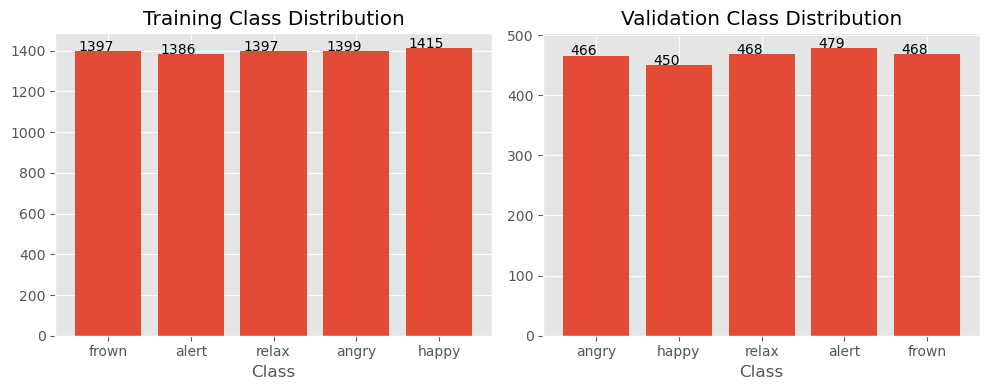

In [11]:
# Function to count class distribution
def class_distribution(dataset, class_names):
    #global class_counts
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    return class_counts

# Function to plot the class distribution
def plot_class_distribution(dataset, class_names):
    class_counts = class_distribution(dataset, class_names)
    
    #fig, ax = plt.subplots()
    bars = plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    #plt.ylabel('Count')
    plt.title('Image Class Distribution')
    
    # Add class count as text overlay on each bar
    for bar, value in zip(bars, class_counts.values()):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, 
                 bar.get_height() + 0.2, 
                 str(value), 
                 ha = 'center', 
                 color = 'black')
    plt.tight_layout()

# Plot the class distribution for the training dataset
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plot_class_distribution(ds_train, class_names)
plt.title('Training Class Distribution')

# Plot the validation class distribuition
plt.subplot(1, 2, 2)
plot_class_distribution(ds_val, class_names)
plt.title('Validation Class Distribution')

plt.tight_layout()
plt.show()

In [12]:
train_class_dist = class_distribution(ds_train, class_names)

weights = []
for i in train_class_dist.values():
    w = i / sum(train_class_dist.values())
    weights.append(w)
    
class_weight = dict(zip([0, 1, 2, 3, 4], weights))

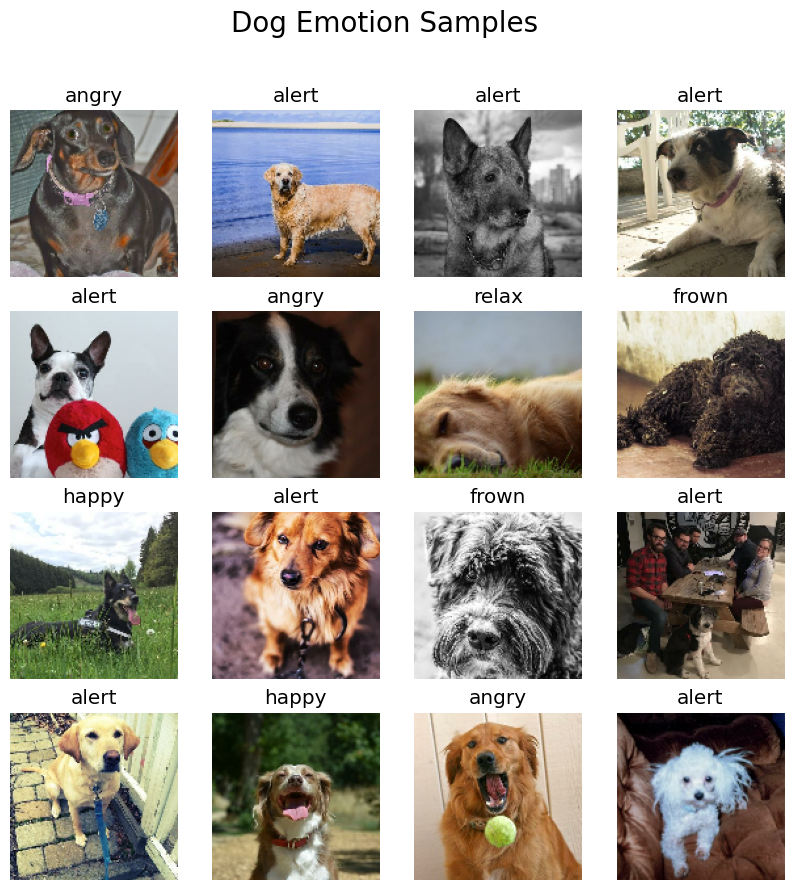

In [13]:
# Sample 16 random images for the training data set with their labels
plt.figure(figsize = (10, 10))
for images, labels in ds_train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ds_train.class_names[int(tf.where(labels[i] == 1).numpy())])
    plt.suptitle('Dog Emotion Samples', fontsize = 20)
    plt.axis("off")

## CNN Transfer Learning Model Design<a id='step6'></a>

#### CNN Model Parameters<a id='step6.a'></a>

* Batch size of 32 provided a good balance of model training performance improvement and compute resources.
* Kernel size of 3 is a common and well established paramter for learning patterns within the image in 3x3 pixel windows.
* Activation Layer of Leaky Rectified Linear Unit (`Leaky ReLU`) is an adjustment from the regular `ReLU` by returning a small negative values for a negative input instead of a zero.
    - $Leaky \ ReLU \ (x) = \begin{cases} 0.2x & x < 0 \\ x & x \ge 0\end{cases}$
* Output Activation layer of `Softmax` is designed for multi-classifcation model...
* Pool size of 2x2 provided
* `Adam` Optimization algorithm provides
    - I found reducing the learning rate by a tenth provided improved fine-tuning performance.
* Loss Function of `Categorical Crossentroy` provides
* Metrics of `Accuracy`, `F1 Score`
* A maximum of 500 epochs was selected simply because it was epoch limit I was willing to train the model (which never happened).

[Return to the Project Flow and Plan](#plan)

In [14]:
# Layer paramters
kernel_size = 5
layer_act   = tf.keras.layers.LeakyReLU(alpha = 0.2, name = 'leaky_relu')
out_act     = 'softmax'
pool_size   = (2, 2)
FC_drop     = .4

# Modeling parameters
LR_param    = 0.001 
opt_tl      = tf.keras.optimizers.Adam(learning_rate = 0.001, name = 'adam_tl')
opt_ft      = tf.keras.optimizers.Adam(learning_rate = 0.0001, name = 'adam_ft')
loss_func   = tf.keras.losses.CategoricalCrossentropy(name = 'categorical_crossentropy')

metric      = ['accuracy',
               tf.keras.metrics.F1Score(average = 'macro', threshold = 0.5, name = 'f1_score')]
epochs      = 500
#work_param  = multiprocessing.cpu_count()

#### CNN Callback Features<a id='step6.b'></a>

* The "reduce learning rate" callback provides improved model performance by reducing the learning rate by a certain factor after a certain number of epochs with no categorical crossentroy (`loss`) reduction, known as "patience".
    - I applied a separate callback for the tranfer learning training and the fine-tuning training, in order to enable "fine tuning by more sensistive learning rate adjustments (lowered learning rate reduction factor from $.5$ to $.2$, as well as increased the patience).
* The "model checkpoint" saves the best model weights for future use.
* The "early stop monitor" prevent the model from needlessly training to the 500th epoch if no performance improvement (`loss`) is observed after six epochs (i.e. the model plateous, or degrades).

[Return to the Project Flow and Plan](#plan)

In [15]:
# Callback to reduce the RMSProp optimizing learning rate when the loss metric stops improving
call_LR = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 2,
                            verbose  = 1, 
                            factor   = 0.5,
                            min_lr   = 0.0001)

call_LR_FT = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 3,
                            verbose  = 1, 
                            factor   = 0.2,
                            min_lr   = 0.0001)

# Callback to save the best metrics (validation accuracy)
call_save = ModelCheckpoint('C:/Users/dougr/Rogi_Emotions_CNN',
                            monitor = 'val_accuracy',
                            mode           = 'max',
                            verbose        = 1,
                            save_best_only = True)

# Callback to stop training after 6 epochs of validation loss (categorical cross-entropy) degredation
call_stop = EarlyStopping(monitor  = 'val_loss', 
                          mode     = 'min', 
                          verbose  = 1,
                          patience = 6)

#### CNN Transfer Learning Model Set-up<a id='step6.c'></a>

[Return to the Project Flow and Plan](#plan)

In [16]:
# Autotune dynamically to prefetch (read) data in parallel while training
AUTOTUNE = tf.data.AUTOTUNE

# Cache the data in memory for effificent training across epochs
ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size = AUTOTUNE)

In [17]:
# Another check that the GPU is used by Tensorflow
tf.test.is_built_with_cuda()

True

In [18]:
# EfficientNet V2-S transfer leanring
tl_model = EfficientNetV2S(include_top = False,
                           weights = 'imagenet',
                           input_shape = (img_size, img_size, 3),
                           pooling = None,
                           include_preprocessing = True)

tl_model.trainable = False
#tl_model.summary()

In [19]:
# Input Layer
input_layer = Sequential([
    Input((img_size, img_size, 3))])

# Image Augmentation Layer
img_aug_layer = Sequential([
    RandomFlip(),
    RandomRotation(factor = 0.25),
    RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    RandomContrast(factor = 0.25)],
    name = 'Image_Augmentation')

# Top layer CNN addition
# MaxPool2D, AveragePooling2D, GlobalAveragePooling2D
top_layer_pooling = Sequential([
    AveragePooling2D(pool_size = pool_size, strides = pool_size, padding = 'valid'),
    #GlobalAveragePooling2D(),
    BatchNormalization(),
    #Dropout(.),
    Flatten()],
    name = 'Top_Layer_Pooling')

# Top fully connected layer
top_FC_layer = Sequential([
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop),
    Dense(units = 16, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop)
],
    name = 'Top_Hidden_Layers')

# Combined model with a specified name
model1 = Sequential(name = 'Transfer_Learning_Image_Classification')

# Add layers to the model
model1.add(Input((img_size, img_size, 3)))
model1.add(img_aug_layer)
model1.add(tl_model)
model1.add(top_layer_pooling)
model1.add(top_FC_layer)
model1.add(Dense(units = len(class_names),
                 activation = out_act,
                 dtype = 'float32',
                 name = 'Multi-Class_Output'))

# Summarize the model
model1.summary(line_length = 100)

Model: "Transfer_Learning_Image_Classification"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 Image_Augmentation (Sequential)             (None, 128, 128, 3)                     0              
                                                                                                    
 efficientnetv2-s (Functional)               (None, 4, 4, 1280)                      20331360       
                                                                                                    
 Top_Layer_Pooling (Sequential)              (None, 5120)                            5120           
                                                                                                    
 Top_Hidden_Layers (Sequential)              (None, 16)                              83344          
                                           

#### Train the CNN Transfer Learning Model<a id='step6.d'></a>

[Return to the Project Flow and Plan](#plan)

In [20]:
# Compile the model optimizing categorical cross-entropy using the RMSprop loss function, while monitoring accuracy
model1.compile(
    optimizer = opt_tl,
    loss = loss_func,
    metrics = metric)

In [21]:
# Start the model run time
start_time = datetime.datetime.now()

# Train the CNN model up to 500 max epochs and an early stop callback
fit_history1 = model1.fit(ds_train,
                          class_weight = class_weight,
                          epochs = epochs,
                          verbose = 1,
                          validation_data = ds_val,
                          callbacks = [call_LR, call_stop])
# Stop the model run time
stop_time = datetime.datetime.now()

Epoch 1/500


2024-05-09 23:47:31.417267: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-09 23:47:31.682814: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-09 23:47:35.052730: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb22ca5f930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-09 23:47:35.052800: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-09 23:47:35.081567: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1715312855.212388  142830 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 [==============================] - 36s 238ms/step - loss: 0.4093 - accuracy: 0.2026 - f1_score: 0.0948 - val_loss: 1.6116 - val_accuracy: 0.2124 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/500
55/55 [==============================] - 7s 136ms/step - loss: 0.3692 - accuracy: 0.2176 - f1_score: 0.0762 - val_loss: 1.5952 - val_accuracy: 0.2415 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 3/500
55/55 [==============================] - 7s 134ms/step - loss: 0.3506 - accuracy: 0.2173 - f1_score: 0.0528 - val_loss: 1.5883 - val_accuracy: 0.2428 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 4/500
55/55 [==============================] - 8s 141ms/step - loss: 0.3388 - accuracy: 0.2379 - f1_score: 0.0482 - val_loss: 1.5743 - val_accuracy: 0.2806 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 5/500
55/55 [==============================] - 9s 156ms/step - loss: 0.3315 - accuracy: 0.2546 - f1_score: 0.0395 - val_loss: 1.5573 - val_accuracy: 0.2823 - val_f1_score: 0.0000e+00 - lr: 0.0010
E

55/55 [==============================] - 9s 169ms/step - loss: 0.2875 - accuracy: 0.3480 - f1_score: 0.0895 - val_loss: 1.3596 - val_accuracy: 0.4058 - val_f1_score: 0.0633 - lr: 1.0000e-04
Epoch 39/500
55/55 [==============================] - 9s 171ms/step - loss: 0.2863 - accuracy: 0.3530 - f1_score: 0.0883 - val_loss: 1.3594 - val_accuracy: 0.4063 - val_f1_score: 0.0719 - lr: 1.0000e-04
Epoch 40/500
55/55 [==============================] - 9s 172ms/step - loss: 0.2855 - accuracy: 0.3557 - f1_score: 0.0915 - val_loss: 1.3599 - val_accuracy: 0.4050 - val_f1_score: 0.0688 - lr: 1.0000e-04
Epoch 41/500
55/55 [==============================] - 9s 172ms/step - loss: 0.2850 - accuracy: 0.3477 - f1_score: 0.0901 - val_loss: 1.3583 - val_accuracy: 0.4063 - val_f1_score: 0.0711 - lr: 1.0000e-04
Epoch 42/500
55/55 [==============================] - 9s 169ms/step - loss: 0.2881 - accuracy: 0.3509 - f1_score: 0.0937 - val_loss: 1.3590 - val_accuracy: 0.4033 - val_f1_score: 0.0667 - lr: 1.0000e-0

In [22]:
# Print the model runtime
tl_time = stop_time - start_time
print ('Time required for training Model: ', tl_time)

Time required for training Model:  0:09:50.302526


#### CNN Transfer Learning Model Performance Analysis<a id='step6.e'></a>

Initial modeling training with transfer learning and four hidden dense layers resulted in a top validation accuracy of 54.54% and minimal categorial cross-entropy of 1.1404 after 30 epochs.

[Return to the Project Flow and Plan](#plan)

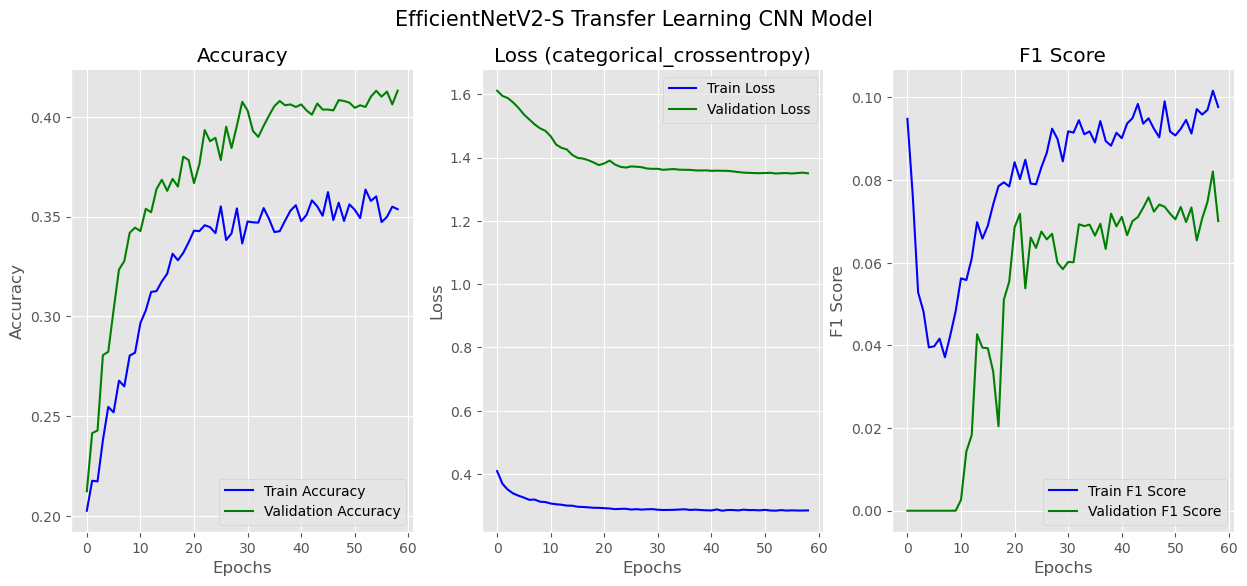

In [23]:
# Collect training and validation metric data from the model training
acc        = fit_history1.history['accuracy']    
val_acc    = fit_history1.history['val_accuracy']
loss       = fit_history1.history['loss']
val_loss   = fit_history1.history['val_loss']
f1         = fit_history1.history['f1_score']
val_f1     = fit_history1.history['val_f1_score']
num_epochs = range(len(acc))

# Plot the Training and Test accuracy over all the epochs
fig1, ax1 = plt.subplots(1, 3, figsize = (15, 6))
fig1.suptitle('EfficientNetV2-S Transfer Learning CNN Model', c = 'k', fontsize = '15')

ax1[0].plot(acc, 'b-', label = 'Train Accuracy')
ax1[0].plot(val_acc, 'g-', label = 'Validation Accuracy')
ax1[0].set_title('Accuracy')
ax1[0].legend()
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Accuracy')
ax1[0].spines['right'].set_visible(False)
ax1[0].spines['top'].set_visible(False)

ax1[1].plot(loss, 'b-', label = 'Train Loss')
ax1[1].plot(val_loss, 'g-', label = 'Validation Loss')
ax1[1].set_title('Loss (' + loss_func.name + ')')     
ax1[1].legend()
ax1[1].set_xlabel('Epochs')                                            
ax1[1].set_ylabel('Loss')
ax1[1].spines['right'].set_visible(False)
ax1[1].spines['top'].set_visible(False)

ax1[2].plot(f1, 'b-', label = 'Train F1 Score')
ax1[2].plot(val_f1, 'g-', label = 'Validation F1 Score')
ax1[2].set_title('F1 Score')     
ax1[2].legend()
ax1[2].set_xlabel('Epochs')                                            
ax1[2].set_ylabel('F1 Score')
ax1[2].spines['right'].set_visible(False)
ax1[2].spines['top'].set_visible(False)

plt.show()
fig1.savefig('Model_plot_tl.jpg')

In [24]:
# Show Model validation metric output
tl_val_loss, tl_val_acc, tl_val_f1 = model1.evaluate(ds_val)

19/19 [==============================] - 2s 105ms/step - loss: 1.3506 - accuracy: 0.4131 - f1_score: 0.0701


## CNN Fine-Tuning Model Design<a id='step7'></a>

[Return to the Project Flow and Plan](#plan)

#### CNN Fine-Tuning Model Set-up<a id='step7.a'></a>

[Return to the Project Flow and Plan](#plan)

In [25]:
# Un-freeze the top layers of the model
tl_model.trainable = True
print('Number of layers in the base model: ', len(tl_model.layers))
print('Number of layers in the final model: ', len(model1.layers))

Number of layers in the base model:  513
Number of layers in the final model:  5


In [26]:
tl_model.summary(line_length = 100)

Model: "efficientnetv2-s"
____________________________________________________________________________________________________
 Layer (type)                 Output Shape                  Param #   Connected to                  
 input_1 (InputLayer)         [(None, 128, 128, 3)]         0         []                            
                                                                                                    
 rescaling (Rescaling)        (None, 128, 128, 3)           0         ['input_1[0][0]']             
                                                                                                    
 stem_conv (Conv2D)           (None, 64, 64, 24)            648       ['rescaling[0][0]']           
                                                                                                    
 stem_bn (BatchNormalization  (None, 64, 64, 24)            96        ['stem_conv[0][0]']           
 )                                                               

 block2c_expand_bn (BatchNor  (None, 32, 32, 192)           768       ['block2c_expand_conv[0][0]'] 
 malization)                                                                                        
                                                                                                    
 block2c_expand_activation (  (None, 32, 32, 192)           0         ['block2c_expand_bn[0][0]']   
 Activation)                                                                                        
                                                                                                    
 block2c_project_conv (Conv2  (None, 32, 32, 48)            9216      ['block2c_expand_activation[0]
 D)                                                                   [0]']                         
                                                                                                    
 block2c_project_bn (BatchNo  (None, 32, 32, 48)            192       ['block2c_project_con

 D)                                                                   [0]']                         
                                                                                                    
 block3c_project_bn (BatchNo  (None, 16, 16, 64)            256       ['block3c_project_conv[0][0]']
 rmalization)                                                                                       
                                                                                                    
 block3c_drop (Dropout)       (None, 16, 16, 64)            0         ['block3c_project_bn[0][0]']  
                                                                                                    
 block3c_add (Add)            (None, 16, 16, 64)            0         ['block3c_drop[0][0]',        
                                                                       'block3b_add[0][0]']         
                                                                                           

 block4b_activation (Activat  (None, 8, 8, 512)             0         ['block4b_bn[0][0]']          
 ion)                                                                                               
                                                                                                    
 block4b_se_squeeze (GlobalA  (None, 512)                   0         ['block4b_activation[0][0]']  
 veragePooling2D)                                                                                   
                                                                                                    
 block4b_se_reshape (Reshape  (None, 1, 1, 512)             0         ['block4b_se_squeeze[0][0]']  
 )                                                                                                  
                                                                                                    
 block4b_se_reduce (Conv2D)   (None, 1, 1, 32)              16416     ['block4b_se_reshape[

 ion)                                                                                               
                                                                                                    
 block4d_activation (Activat  (None, 8, 8, 512)             0         ['block4d_bn[0][0]']          
 ion)                                                                                               
                                                                                                    
 block4d_se_squeeze (GlobalA  (None, 512)                   0         ['block4d_activation[0][0]']  
 veragePooling2D)                                                                                   
                                                                                                    
 block4d_se_reshape (Reshape  (None, 1, 1, 512)             0         ['block4d_se_squeeze[0][0]']  
 )                                                                                         

                                                                                                    
 block4f_bn (BatchNormalizat  (None, 8, 8, 512)             2048      ['block4f_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                                    
 block4f_activation (Activat  (None, 8, 8, 512)             0         ['block4f_bn[0][0]']          
 ion)                                                                                               
                                                                                                    
 block4f_se_squeeze (GlobalA  (None, 512)                   0         ['block4f_activation[0][0]']  
 veragePooling2D)                                                                                   
                                                                                           

                                                                                                    
 block5b_activation (Activat  (None, 8, 8, 960)             0         ['block5b_bn[0][0]']          
 ion)                                                                                               
                                                                                                    
 block5b_se_squeeze (GlobalA  (None, 960)                   0         ['block5b_activation[0][0]']  
 veragePooling2D)                                                                                   
                                                                                                    
 block5b_se_reshape (Reshape  (None, 1, 1, 960)             0         ['block5b_se_squeeze[0][0]']  
 )                                                                                                  
                                                                                           

 block5d_bn (BatchNormalizat  (None, 8, 8, 960)             3840      ['block5d_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                                    
 block5d_activation (Activat  (None, 8, 8, 960)             0         ['block5d_bn[0][0]']          
 ion)                                                                                               
                                                                                                    
 block5d_se_squeeze (GlobalA  (None, 960)                   0         ['block5d_activation[0][0]']  
 veragePooling2D)                                                                                   
                                                                                                    
 block5d_se_reshape (Reshape  (None, 1, 1, 960)             0         ['block5d_se_squeeze[

 onv2D)                                                               [0]']                         
                                                                                                    
 block5f_bn (BatchNormalizat  (None, 8, 8, 960)             3840      ['block5f_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                                    
 block5f_activation (Activat  (None, 8, 8, 960)             0         ['block5f_bn[0][0]']          
 ion)                                                                                               
                                                                                                    
 block5f_se_squeeze (GlobalA  (None, 960)                   0         ['block5f_activation[0][0]']  
 veragePooling2D)                                                                          

                                                                                                    
 block5h_dwconv2 (DepthwiseC  (None, 8, 8, 960)             8640      ['block5h_expand_activation[0]
 onv2D)                                                               [0]']                         
                                                                                                    
 block5h_bn (BatchNormalizat  (None, 8, 8, 960)             3840      ['block5h_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                                    
 block5h_activation (Activat  (None, 8, 8, 960)             0         ['block5h_bn[0][0]']          
 ion)                                                                                               
                                                                                           

 block6a_expand_activation (  (None, 8, 8, 960)             0         ['block6a_expand_bn[0][0]']   
 Activation)                                                                                        
                                                                                                    
 block6a_dwconv2 (DepthwiseC  (None, 4, 4, 960)             8640      ['block6a_expand_activation[0]
 onv2D)                                                               [0]']                         
                                                                                                    
 block6a_bn (BatchNormalizat  (None, 4, 4, 960)             3840      ['block6a_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                                    
 block6a_activation (Activat  (None, 4, 4, 960)             0         ['block6a_bn[0][0]'] 

 block6c_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6c_expand_activation[0]
 onv2D)                                                               [0]']                         
                                                                                                    
 block6c_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6c_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                                    
 block6c_activation (Activat  (None, 4, 4, 1536)            0         ['block6c_bn[0][0]']          
 ion)                                                                                               
                                                                                                    
 block6c_se_squeeze (GlobalA  (None, 1536)                  0         ['block6c_activation[

 Activation)                                                                                        
                                                                                                    
 block6e_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6e_expand_activation[0]
 onv2D)                                                               [0]']                         
                                                                                                    
 block6e_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6e_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                                    
 block6e_activation (Activat  (None, 4, 4, 1536)            0         ['block6e_bn[0][0]']          
 ion)                                                                                      

                                                                                                    
 block6g_expand_activation (  (None, 4, 4, 1536)            0         ['block6g_expand_bn[0][0]']   
 Activation)                                                                                        
                                                                                                    
 block6g_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6g_expand_activation[0]
 onv2D)                                                               [0]']                         
                                                                                                    
 block6g_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6g_dwconv2[0][0]']     
 ion)                                                                                               
                                                                                           

 block6i_expand_bn (BatchNor  (None, 4, 4, 1536)            6144      ['block6i_expand_conv[0][0]'] 
 malization)                                                                                        
                                                                                                    
 block6i_expand_activation (  (None, 4, 4, 1536)            0         ['block6i_expand_bn[0][0]']   
 Activation)                                                                                        
                                                                                                    
 block6i_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6i_expand_activation[0]
 onv2D)                                                               [0]']                         
                                                                                                    
 block6i_bn (BatchNormalizat  (None, 4, 4, 1536)            6144      ['block6i_dwconv2[0][

 )                                                                                                  
                                                                                                    
 block6k_expand_bn (BatchNor  (None, 4, 4, 1536)            6144      ['block6k_expand_conv[0][0]'] 
 malization)                                                                                        
                                                                                                    
 block6k_expand_activation (  (None, 4, 4, 1536)            0         ['block6k_expand_bn[0][0]']   
 Activation)                                                                                        
                                                                                                    
 block6k_dwconv2 (DepthwiseC  (None, 4, 4, 1536)            13824     ['block6k_expand_activation[0]
 onv2D)                                                               [0]']                

                                                                                                    
 block6m_expand_conv (Conv2D  (None, 4, 4, 1536)            393216    ['block6l_add[0][0]']         
 )                                                                                                  
                                                                                                    
 block6m_expand_bn (BatchNor  (None, 4, 4, 1536)            6144      ['block6m_expand_conv[0][0]'] 
 malization)                                                                                        
                                                                                                    
 block6m_expand_activation (  (None, 4, 4, 1536)            0         ['block6m_expand_bn[0][0]']   
 Activation)                                                                                        
                                                                                           

 block6n_add (Add)            (None, 4, 4, 256)             0         ['block6n_drop[0][0]',        
                                                                       'block6m_add[0][0]']         
                                                                                                    
 block6o_expand_conv (Conv2D  (None, 4, 4, 1536)            393216    ['block6n_add[0][0]']         
 )                                                                                                  
                                                                                                    
 block6o_expand_bn (BatchNor  (None, 4, 4, 1536)            6144      ['block6o_expand_conv[0][0]'] 
 malization)                                                                                        
                                                                                                    
 block6o_expand_activation (  (None, 4, 4, 1536)            0         ['block6o_expand_bn[0

In [27]:
# Select a block to begin fine tuning EfficientNetV2S layer
fine_tune_at = tl_model.layers.index(tl_model.get_layer('block6d_expand_conv'))

# Freeze all the layers before the 'fine_tune_at' layer
#for layer in tl_model.layers[ : fine_tune_at]:
#  layer.trainable = False

# Unfreeze the tl_model entirely (batch normalization layer statistics will not change - model will run in inference mode).
tl_model.trainable = True

In [28]:
model1.summary(line_length = 100)

Model: "Transfer_Learning_Image_Classification"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 Image_Augmentation (Sequential)             (None, 128, 128, 3)                     0              
                                                                                                    
 efficientnetv2-s (Functional)               (None, 4, 4, 1280)                      20331360       
                                                                                                    
 Top_Layer_Pooling (Sequential)              (None, 5120)                            5120           
                                                                                                    
 Top_Hidden_Layers (Sequential)              (None, 16)                              83344          
                                           

#### Train and Fine-Tune the CNN Transfer Learning Model<a id='step7.b'></a>

[Return to the Project Flow and Plan](#plan)

In [29]:
# Compile the model
model1.compile(
    optimizer = opt_ft,
    loss = loss_func,
    metrics = metric)

# Start the model run time
second_start_time = datetime.datetime.now()

# Train the CNN model
history1_fine = model1.fit(ds_train,
                           epochs = epochs,
                           initial_epoch = fit_history1.epoch[-1],
                           verbose = 1,
                           validation_data = ds_val,
                           callbacks = [call_LR_FT, call_stop])

# Stop the model run time
second_stop_time = datetime.datetime.now()
ft_time = second_stop_time - second_start_time
print ('Time required for fine-tuning the model: ', ft_time)

Epoch 59/500


2024-05-09 23:58:10.883502: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 968.91MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 23:58:11.014319: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 968.91MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 23:58:11.896219: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 912.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 23:58:12.103251: W external/local_tsl/tsl/framewor

55/55 [==============================] - 130s 666ms/step - loss: 1.4904 - accuracy: 0.3223 - f1_score: 0.0820 - val_loss: 1.3322 - val_accuracy: 0.4071 - val_f1_score: 0.1354 - lr: 1.0000e-04
Epoch 60/500
55/55 [==============================] - 28s 508ms/step - loss: 1.4099 - accuracy: 0.3636 - f1_score: 0.1035 - val_loss: 1.2945 - val_accuracy: 0.4071 - val_f1_score: 0.1438 - lr: 1.0000e-04
Epoch 61/500
55/55 [==============================] - 28s 514ms/step - loss: 1.3821 - accuracy: 0.3737 - f1_score: 0.1128 - val_loss: 1.2875 - val_accuracy: 0.4041 - val_f1_score: 0.1367 - lr: 1.0000e-04
Epoch 62/500
55/55 [==============================] - 29s 522ms/step - loss: 1.3533 - accuracy: 0.3902 - f1_score: 0.1186 - val_loss: 1.2684 - val_accuracy: 0.4260 - val_f1_score: 0.1425 - lr: 1.0000e-04
Epoch 63/500
55/55 [==============================] - 29s 527ms/step - loss: 1.3401 - accuracy: 0.3945 - f1_score: 0.1222 - val_loss: 1.2629 - val_accuracy: 0.4208 - val_f1_score: 0.1448 - lr: 1.0

55/55 [==============================] - 30s 541ms/step - loss: 0.9167 - accuracy: 0.6257 - f1_score: 0.3130 - val_loss: 1.1217 - val_accuracy: 0.5444 - val_f1_score: 0.2803 - lr: 1.0000e-04
Epoch 100/500
55/55 [==============================] - 30s 543ms/step - loss: 0.8974 - accuracy: 0.6378 - f1_score: 0.3206 - val_loss: 1.0995 - val_accuracy: 0.5397 - val_f1_score: 0.2850 - lr: 1.0000e-04
Epoch 101/500
55/55 [==============================] - 31s 558ms/step - loss: 0.8881 - accuracy: 0.6303 - f1_score: 0.3299 - val_loss: 1.1054 - val_accuracy: 0.5526 - val_f1_score: 0.2899 - lr: 1.0000e-04
Epoch 102/500
55/55 [==============================] - 30s 548ms/step - loss: 0.8908 - accuracy: 0.6324 - f1_score: 0.3288 - val_loss: 1.0950 - val_accuracy: 0.5551 - val_f1_score: 0.2905 - lr: 1.0000e-04
Epoch 103/500
55/55 [==============================] - 30s 544ms/step - loss: 0.8788 - accuracy: 0.6521 - f1_score: 0.3425 - val_loss: 1.1013 - val_accuracy: 0.5526 - val_f1_score: 0.2881 - lr: 

#### Fine-Tuned CNN Transfer Leaning Model Performance Analysis<a id='step7.c'></a>

[Return to the Project Flow and Plan](#plan)

In [30]:
# Collect training and validation metric data from the model training
acc_ft       = acc
acc_ft      += history1_fine.history['accuracy']
val_acc_ft   = val_acc
val_acc_ft  += history1_fine.history['val_accuracy']

loss_ft      = loss
loss_ft     += history1_fine.history['loss']
val_loss_ft  = val_loss
val_loss_ft += history1_fine.history['val_loss']

f1_ft        = f1
f1_ft       += history1_fine.history['f1_score']
val_f1_ft    = val_f1
val_f1_ft   += history1_fine.history['val_f1_score']

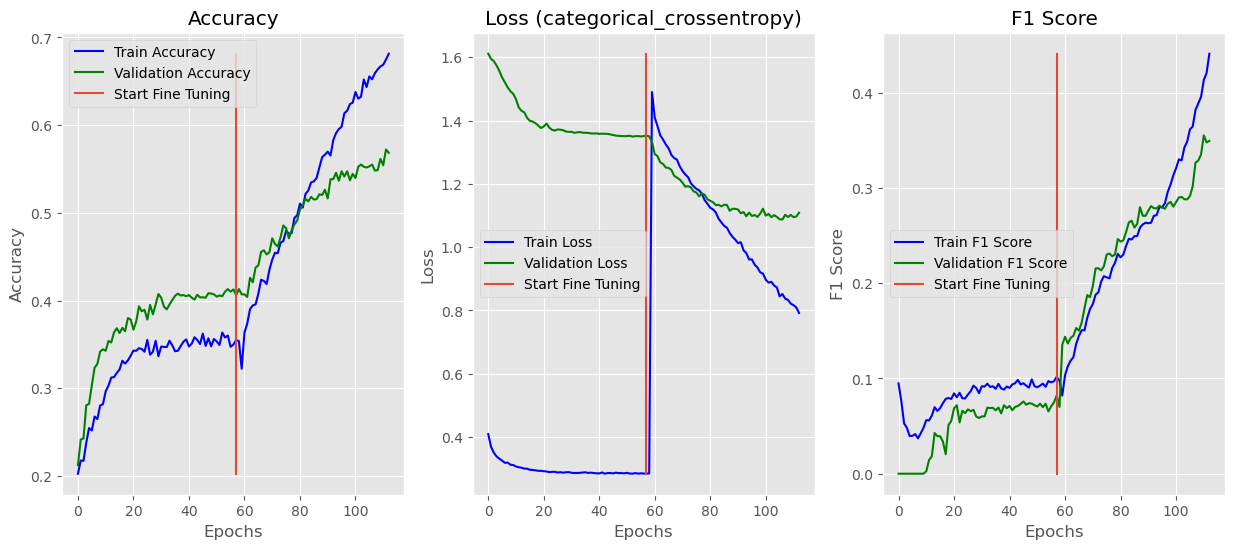

In [31]:
# Plot the Training and Test accuracy over all the epochs
fig2, ax2 = plt.subplots(1, 3, figsize = (15, 6))
#fig1.subtitle('CNN Model', c = 'k', fontsize = '15')

ax2[0].plot(acc_ft, 'b-', label = 'Train Accuracy')
ax2[0].plot(val_acc_ft, 'g-', label = 'Validation Accuracy')   
ax2[0].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(acc), min(acc_ft), min(val_acc), min(val_acc_ft)), max(max(acc), max(acc_ft), max(val_acc), max(val_acc_ft))],
            label = 'Start Fine Tuning')
ax2[0].set_title('Accuracy')
ax2[0].legend()
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Accuracy')

ax2[1].plot(loss_ft, 'b-', label = 'Train Loss')
ax2[1].plot(val_loss_ft, 'g-', label = 'Validation Loss')
ax2[1].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(loss), min(loss_ft), min(val_loss), min(val_loss_ft)), max(max(loss), max(loss_ft), max(val_loss), max(val_loss_ft))], 
            label = 'Start Fine Tuning')
ax2[1].set_title('Loss (' + loss_func.name + ')')
ax2[1].legend()
ax2[1].set_xlabel('Epochs')                                             
ax2[1].set_ylabel('Loss')

ax2[2].plot(f1_ft, 'b-', label = 'Train F1 Score')
ax2[2].plot(val_f1_ft, 'g-', label = 'Validation F1 Score')
ax2[2].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(f1), min(f1_ft), min(val_f1), min(val_f1_ft)), max(max(f1), max(f1_ft), max(val_f1), max(val_f1_ft))], 
            label = 'Start Fine Tuning')
ax2[2].set_title('F1 Score')
ax2[2].legend()
ax2[2].set_xlabel('Epochs')                                             
ax2[2].set_ylabel('F1 Score')

plt.show()
fig2.savefig('Model_plot_ft.jpg')

In [32]:
# Show Fine-Tuned Model output
ft_val_loss, ft_val_acc, ft_val_f1 = model1.evaluate(ds_val)

19/19 [==============================] - 2s 110ms/step - loss: 1.1091 - accuracy: 0.5684 - f1_score: 0.3493


#### Display Predicted Emotions From Validation Set<a id='step7.d'></a>

[Return to the Project Flow and Plan](#plan)

In [33]:
# Recall the Validation data set
ds_val = image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    seed = seed,
    validation_split = .2,
    subset = 'validation')

Found 9325 files belonging to 5 classes.
Using 1865 files for validation.


In [34]:
# Get validation predictions
val_probs = model1.predict(ds_val)

15/15 [==============================] - 10s 239ms/step


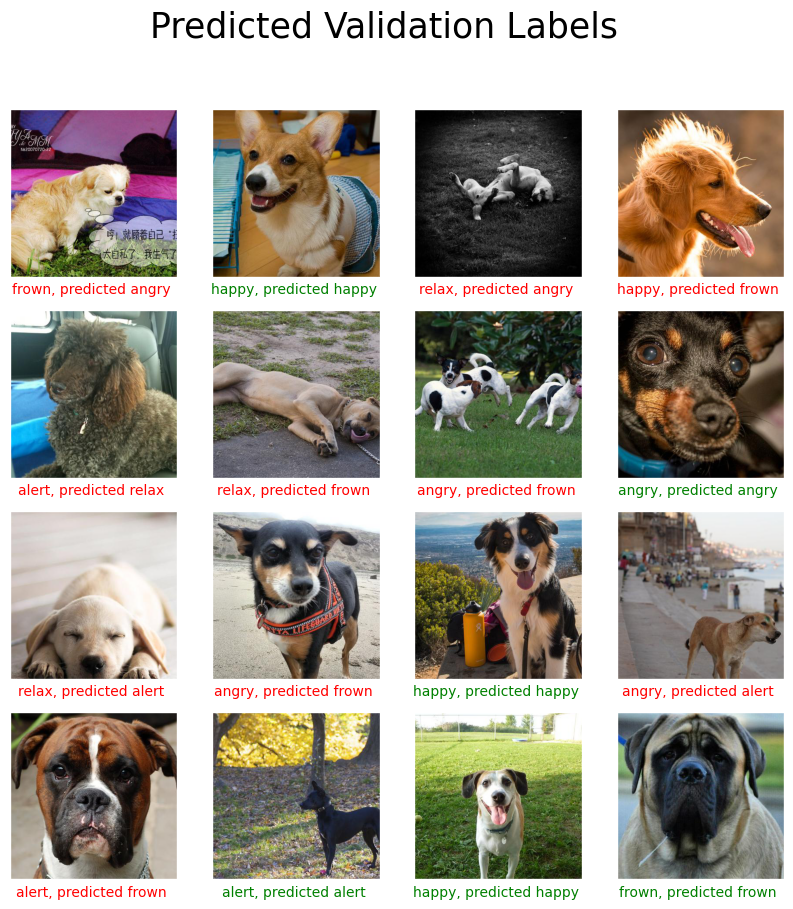

In [35]:
from tensorflow.keras.preprocessing.image import load_img
# Set total number of images to plot
num_pics = 16

# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_val.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig3, ax3 = plt.subplots(figsize = (10, 10))
ax3.remove()

for i in range(num_pics):
    fig3.suptitle('Predicted Validation Labels', size = 25)
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(val_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    actual = ds_val.file_paths[start_index + i][85:90]
    
    if pred != actual:
        col = 'r'
    else:
        col = 'g'
    
    plt.xlabel('{}, predicted {} '.format(actual, pred), 
               color = col, fontsize = 10)
    plt.imshow(load_img(ds_val.file_paths[start_index + i]))
    
    plt.tight_layout

## Final CNN Model Confusion Matrix<a id='step8'></a>

[Return to the Project Flow and Plan](#plan)

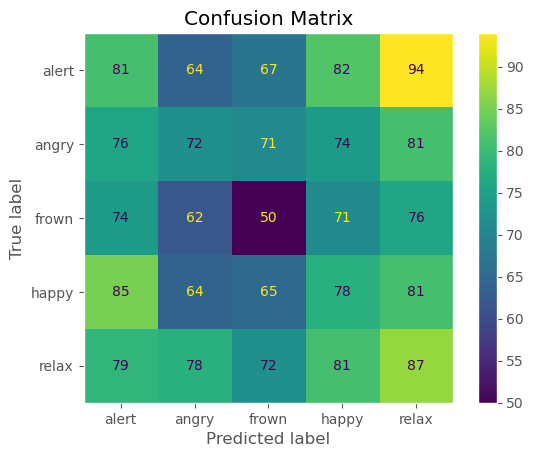

              precision    recall  f1-score   support

       alert       0.21      0.21      0.21       395
       angry       0.19      0.21      0.20       340
       frown       0.15      0.15      0.15       325
       happy       0.21      0.20      0.21       386
       relax       0.22      0.21      0.21       419

    accuracy                           0.20      1865
   macro avg       0.20      0.20      0.20      1865
weighted avg       0.20      0.20      0.20      1865



In [49]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

val_preds = list(val_probs.argmax(axis = 1))

val_labels = [label[85:90] for label in ds_val.file_paths]

lab_encoder = preprocessing.LabelEncoder()
lab_encoder.fit(val_labels)
val_actual_labels = lab_encoder.transform(val_labels)

def cm_plot_metrics(actual_labels, pred_labels, label_names):
    cm = confusion_matrix(actual_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                  display_labels = label_names)
    
    disp.plot()
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.show()
    
    print(classification_report(pred_labels, actual_labels, 
                                target_names = label_names))

cm_plot_metrics(val_actual_labels, 
                val_preds, 
                class_names)

## Final CNN Model Evaluation on Unseen Images of Perogi<a id='step9'></a>

[Return to the Project Flow and Plan](#plan)

#### Read in Rogi Images

In [37]:
directory_path = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images'

# Create dataset for unseen Rogi images
ds_rogi = tf.keras.utils.image_dataset_from_directory(
    directory_path,
    labels=None,  # Labels will be inferred from subdirectory names
    class_names=None,  # Class names will be inferred
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_size, img_size),
    shuffle=False,  # No need to shuffle for unseen data
    seed=seed
)

Found 212 files belonging to 1 classes.


#### Predict and Plot Rogi Emotions

In [38]:
# Predict Rogi label probabilities
rogi_probs = model1.predict(ds_rogi)

2/2 [==============================] - 8s 2s/step


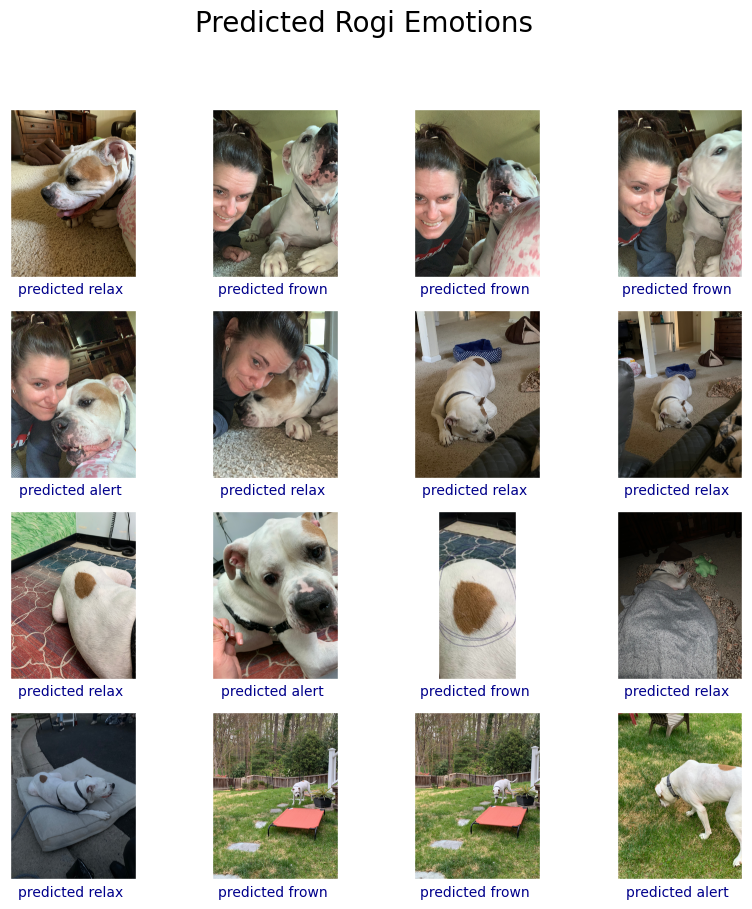

In [47]:
# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_rogi.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig4, ax4 = plt.subplots(figsize = (10, 10))
fig4.suptitle('Predicted Rogi Emotions', size = 20)
ax4.remove()

for i in range(num_pics):
    
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(rogi_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    plt.xlabel('predicted {} '.format(pred), color = 'darkblue', fontsize = 10)
    plt.imshow(load_img(ds_rogi.file_paths[start_index + i]))

    plt.tight_layout

1/1 [==============================] - 1s 1s/step


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

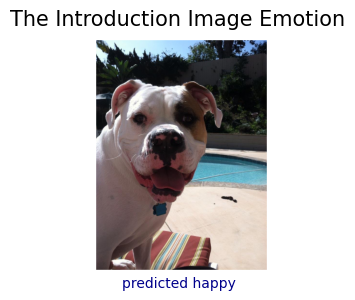

In [40]:
#Run the model on the introduction image of Perogi

from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (img_size, img_size, 3))
   np_image = np.expand_dims(np_image, axis = 0)
   return np_image

intro_image_pred = model1.predict(load(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_3501.jpg'))

# Set new plot subclasses to iterate over random predictions
fig5, ax5 = plt.subplots(figsize = (3, 3))
fig5.suptitle('The Introduction Image Emotion', size = 15)
ax5.remove()

plt.grid(False)
plt.xticks([])
plt.yticks([])

pred = np.argmax(intro_image_pred)
if pred == 0:
    pred = class_names[0] 
elif pred == 1:
    pred = class_names[1] 
elif pred == 2:
    pred = class_names[2]
elif pred == 3:
    pred = class_names[3]
else:
    pred = class_names[4]

plt.xlabel('predicted {} '.format(pred), color = 'darkblue', fontsize = 10)
plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_3501.jpg'))

plt.tight_layout

## Project Summary and Metrics History Review<a id='step10'></a>

[Return to the Project Flow and Plan](#plan)

In [41]:
# Check if the file already exists in the working directory
file_path = 'model_testing_df.csv'  # Change 'your_dataframe.csv' to the desired file name

if not os.path.exists(file_path):
    # Create a new DataFrame (replace this with your actual data)
    model_testing_df = pd.DataFrame(columns = ['ID',
                                               'Accuracy',
                                               'F1 Score',
                                               'Loss',
                                               'Rogi Happy',
                                               'Training Time',
                                               'Epochs',
                                               'Batch Size',
                                               'Hidden Activation',
                                               'Output Acitvation',
                                               'Optimizer',
                                               'Transfer Learning Model',
                                               'Top CNN Layer',
                                               '# Hidden Layers',
                                               'Dropout',
                                               'Fine Tuning Layer'])


    # Save the updated DataFrame to the same file
    model_testing_df.to_csv(file_path, index = False)
    print(f"DataFrame saved to {file_path}")
else:
    # Load the existing DataFrame
    model_testing_df = pd.read_csv(file_path)
    
    acc = ft_val_acc
    f1 = ft_val_f1
    loss = ft_val_loss
    rogi_happy = pred
    time = str(tl_time + ft_time)
    epoch = len(history1_fine.epoch) + len(fit_history1.epoch) - 1
    batch = batch_size
    h_act = layer_act.name
    o_act = out_act
    opt = opt_ft.name
    tlm = tl_model.name
    top_cnn = any(isinstance(layer, Conv2D) for layer in model1.layers)
    drop = FC_drop
    # Find the index of the 'Top_FC_Hidden_Layers' layer in the model
    top_FC_layer_index = 0#model1.layers.index(top_FC_layer)
    # Extract the Dense layers within 'Top_FC_Hidden_Layers'
    hidden_layer = len([layer for layer in model1.layers[3].layers if isinstance(layer, Dense)])
    ft_layer = fine_tune_at
    ID = len(model_testing_df.index) + 1
    
    model_testing_df.loc[len(model_testing_df.index)] = [ID,
                                                         acc,
                                                         f1,
                                                         loss,
                                                         rogi_happy,
                                                         time,
                                                         epoch,
                                                         batch,
                                                         h_act,
                                                         o_act,
                                                         opt,
                                                         tlm,
                                                         top_cnn,
                                                         hidden_layer,
                                                         drop,
                                                         ft_layer] 

    # Save the updated DataFrame to the same file
    model_testing_df.to_csv(file_path, index = False)

In [42]:
'''# Assuming your model is named 'model1'
dense_layers_info = {}

for i, layer in enumerate(model1.layers):
    if isinstance(layer, Dense):
        if hasattr(layer, 'units'):
            dense_layers_info[i + 1] = layer.units
        else:
            print(f"Warning: Dense layer {i + 1} does not have 'units' attribute.")
    else:
        print(f"Skipping layer {i + 1} as it is not a Dense layer.")

# Print the dictionary
print(dense_layers_info)'''

'# Assuming your model is named \'model1\'\ndense_layers_info = {}\n\nfor i, layer in enumerate(model1.layers):\n    if isinstance(layer, Dense):\n        if hasattr(layer, \'units\'):\n            dense_layers_info[i + 1] = layer.units\n        else:\n            print(f"Warning: Dense layer {i + 1} does not have \'units\' attribute.")\n    else:\n        print(f"Skipping layer {i + 1} as it is not a Dense layer.")\n\n# Print the dictionary\nprint(dense_layers_info)'

In [43]:
model_testing_df

ID  Accuracy  F1 Score      Loss Rogi Happy   Training Time  Epochs  \
0    1  0.592021  0.573264  1.070199      happy         14:42.7      52   
1    2  0.601459  0.583631  1.038346      happy         17:25.4      64   
2    3  0.605749  0.586604  1.045250      happy         19:21.8      68   
3    4  0.601030  0.574090  1.025069      happy         08:00.9      63   
4    5  0.604033  0.579279  1.002969      happy         14:53.5      42   
5    7  0.607465  0.582351  1.024202      happy         22:43.8      78   
6    8  0.623338  0.607758  1.002883      happy         19:20.9      56   
7    9  0.604891  0.578286  1.024074      happy         27:29.9     103   
8    9  0.610039  0.597150  1.024397      happy  0:26:52.310414      95   
9   10  0.584728  0.480671  1.025859      happy  0:23:23.265616      62   
10  11  0.572716  0.391732  1.069140      happy  0:30:57.192828     100   
11  12  0.568426  0.349265  1.109087      happy  0:39:06.491080     112   

    Batch Size Hidden Activation Output Acitvation Optimizer  \
0          128        leaky_relu           softmax   adam_ft   
1          128        leaky_relu           softmax   adam_ft   
2          128        leaky_relu           softmax   adam_ft   
3          128        leaky_relu           softmax   adam_ft   
4          128        leaky_relu           softmax   adam_ft   
5          128        leaky_relu           softmax   adam_ft   
6          128        leaky_relu           softmax   adam_ft   
7          128        leaky_relu           softmax   adam_ft   
8          128        leaky_relu           softmax   adam_ft   
9          128        leaky_relu           softmax   adam_ft   
10         128        leaky_relu           softmax   adam_ft   
11         128        leaky_relu           softmax   adam_ft   

   Transfer Learning Model  Top CNN Layer  # Hidden Layers  Dropout  \
0         efficientnetv2-s          False                1      0.0   
1         efficientnetv2-s          False                1      0.1   
2         efficientnetv2-s          False                1      0.2   
3         efficientnetv2-s          False                1      0.3   
4         efficientnetv2-s          False                1      0.4   
5         efficientnetv2-s          False                1      0.5   
6         efficientnetv2-s          False                1      0.6   
7         efficientnetv2-s          False                1      0.6   
8         efficientnetv2-s          False                2      0.4   
9         efficientnetv2-s          False                3      0.4   
10        efficientnetv2-s          False                4      0.4   
11        efficientnetv2-s          False                5      0.4   

    Fine Tuning Layer  
0                 330  
1                 330  
2                 330  
3                 330  
4                 330  
5                 330  
6                 330  
7                 330  
8                 330  
9                 330  
10                330  
11                330

In [44]:
'''
model_testing_df1 = pd.read_csv('model_testing_df1.csv')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Columns to normalize
columns_to_normalize = ["Accuracy", "Loss", "F1 Score"]

# Columns to standardize
columns_to_standardize = ["Accuracy", "Loss", "F1 Score"]

# Standardization (Z-score normalization)
scaler = StandardScaler()
model_testing_df1[columns_to_standardize] = scaler.fit_transform(model_testing_df1[columns_to_standardize])


# Calculate the performance rating (example formula)
model_testing_df1["Performance Rating"] = (
    model_testing_df1["Accuracy"] +
    (model_testing_df1["Loss"]) +
    model_testing_df1["F1 Score"]
) / 3.0

# Sort the DataFrame by "Performance Rating" in descending order
model_testing_df1 = model_testing_df1.sort_values(by="Performance Rating", ascending=False)

# Save the updated DataFrame to the same file
#model_testing_df1.to_csv(file_path, index=False)
model_testing_df1
'''

'\nmodel_testing_df1 = pd.read_csv(\'model_testing_df1.csv\')\n\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\n\n# Columns to normalize\ncolumns_to_normalize = ["Accuracy", "Loss", "F1 Score"]\n\n# Columns to standardize\ncolumns_to_standardize = ["Accuracy", "Loss", "F1 Score"]\n\n# Standardization (Z-score normalization)\nscaler = StandardScaler()\nmodel_testing_df1[columns_to_standardize] = scaler.fit_transform(model_testing_df1[columns_to_standardize])\n\n\n# Calculate the performance rating (example formula)\nmodel_testing_df1["Performance Rating"] = (\n    model_testing_df1["Accuracy"] +\n    (model_testing_df1["Loss"]) +\n    model_testing_df1["F1 Score"]\n) / 3.0\n\n# Sort the DataFrame by "Performance Rating" in descending order\nmodel_testing_df1 = model_testing_df1.sort_values(by="Performance Rating", ascending=False)\n\n# Save the updated DataFrame to the same file\n#model_testing_df1.to_csv(file_path, index=False)\nmodel_

In [45]:
'''model_testing_df2 = pd.read_csv('model_testing_df2.csv')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Columns to normalize
columns_to_normalize = ["Accuracy", "Loss", "F1 Score"]

# Columns to standardize
columns_to_standardize = ["Accuracy", "Loss", "F1 Score"]

# Standardization (Z-score normalization)
scaler = StandardScaler()
model_testing_df2[columns_to_standardize] = scaler.fit_transform(model_testing_df2[columns_to_standardize])


# Calculate the performance rating (example formula)
model_testing_df2["Performance Rating"] = (
    model_testing_df2["Accuracy"] +
    (1 - model_testing_df2["Loss"]) +
    model_testing_df2["F1 Score"]
) / 3.0

# Sort the DataFrame by "Performance Rating" in descending order
model_testing_df2 = model_testing_df2.sort_values(by="Performance Rating", ascending=False)

# Save the updated DataFrame to the same file
#model_testing_df2.to_csv(file_path, index=False)
model_testing_df2
'''

'model_testing_df2 = pd.read_csv(\'model_testing_df2.csv\')\n\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\n\n# Columns to normalize\ncolumns_to_normalize = ["Accuracy", "Loss", "F1 Score"]\n\n# Columns to standardize\ncolumns_to_standardize = ["Accuracy", "Loss", "F1 Score"]\n\n# Standardization (Z-score normalization)\nscaler = StandardScaler()\nmodel_testing_df2[columns_to_standardize] = scaler.fit_transform(model_testing_df2[columns_to_standardize])\n\n\n# Calculate the performance rating (example formula)\nmodel_testing_df2["Performance Rating"] = (\n    model_testing_df2["Accuracy"] +\n    (1 - model_testing_df2["Loss"]) +\n    model_testing_df2["F1 Score"]\n) / 3.0\n\n# Sort the DataFrame by "Performance Rating" in descending order\nmodel_testing_df2 = model_testing_df2.sort_values(by="Performance Rating", ascending=False)\n\n# Save the updated DataFrame to the same file\n#model_testing_df2.to_csv(file_path, index=False)\nmode